#Setup

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Econometrics for Business in R and Python/1. Difference-in-Differences

/content/drive/MyDrive/Colab Notebooks/Econometrics for Business in R and Python/1. Difference-in-Differences


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
#load dataset
df = pd.read_csv('njmin3.csv')
df.head()

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
0,1,0,0,15.00,1,0,0,0,0,1,0,0,0,12.00
1,1,0,0,15.00,1,0,0,0,0,1,0,0,0,6.50
2,1,0,0,24.00,0,0,1,0,0,1,0,0,0,-1.00
3,1,0,0,19.25,0,0,1,0,1,0,0,0,0,2.25
4,1,0,0,21.50,1,0,0,0,0,0,0,0,0,13.00


#Data Analysis and Processing

In [ ]:
df.describe()

,NJ,POST_APRIL92,NJ_POST_APRIL92,fte,bk,kfc,roys,wendys,co_owned,centralj,southj,pa1,pa2,demp
count,820.000000,820.000000,820.000000,794.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,768.000000
mean,0.807317,0.500000,0.403659,21.026511,0.417073,0.195122,0.241463,0.146341,0.343902,0.153659,0.226829,0.087805,0.104878,-0.070443
std,0.394647,0.500305,0.490930,9.422746,0.493376,0.396536,0.428232,0.353664,0.475299,0.360841,0.419037,0.283184,0.306583,9.016441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-41.500000
25%,1.000000,0.000000,0.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000
50%,1.000000,0.500000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,25.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000


In [ ]:
#check for missing values
df.isnull().sum()

,0
NJ,0
POST_APRIL92,0
NJ_POST_APRIL92,0
fte,26
bk,0
kfc,0
roys,0
wendys,0
co_owned,0
centralj,0


In [ ]:
#replace missing values with mean
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[['fte', 'demp']] = imputer.fit_transform(df[['fte', 'demp']])

In [8]:
df.isnull().sum()

,0
NJ,0
POST_APRIL92,0
NJ_POST_APRIL92,0
fte,0
bk,0
kfc,0
roys,0
wendys,0
co_owned,0
centralj,0


#Model1

In [ ]:
#define the X and y
X = df[['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92']]
y = df['fte']

In [10]:
#adding a constant
X1 = sm.add_constant(X)
X1.head()


,const,NJ,POST_APRIL92,NJ_POST_APRIL92
0,1.0,1,0,0
1,1.0,1,0,0
2,1.0,1,0,0
3,1.0,1,0,0
4,1.0,1,0,0


In [11]:
#regression model
model1 = sm.OLS(y,X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.974
Date:                Mon, 18 Aug 2025   Prob (F-statistic):              0.116
Time:                        14:10:01   Log-Likelihood:                -2986.2
No. Observations:                 820   AIC:                             5980.
Df Residuals:                     816   BIC:                             5999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.2728      1.041     

coefficient for NJ_POST_APRIL92 is positive (~2.68).
This means increasing minimum wages led to increase in employment in fast food restaurants in New Jersey

##Data Visualization

In [12]:
#extracting coefficients
intercept, nj_coef, post_april92_coef, nj_post_arpil92_coef = model1.params


In [13]:
model1.params

,0
const,23.272823
NJ,-2.815678
POST_APRIL92,-2.110759
NJ_POST_APRIL92,2.681010


In [33]:
#calculate fte for each group
pre_pa = intercept
post_pa = intercept + post_april92_coef
pre_nj = intercept + nj_coef
post_nj = intercept + nj_coef + post_april92_coef + nj_post_arpil92_coef
counterfactual = intercept + nj_coef + post_april92_coef

[]

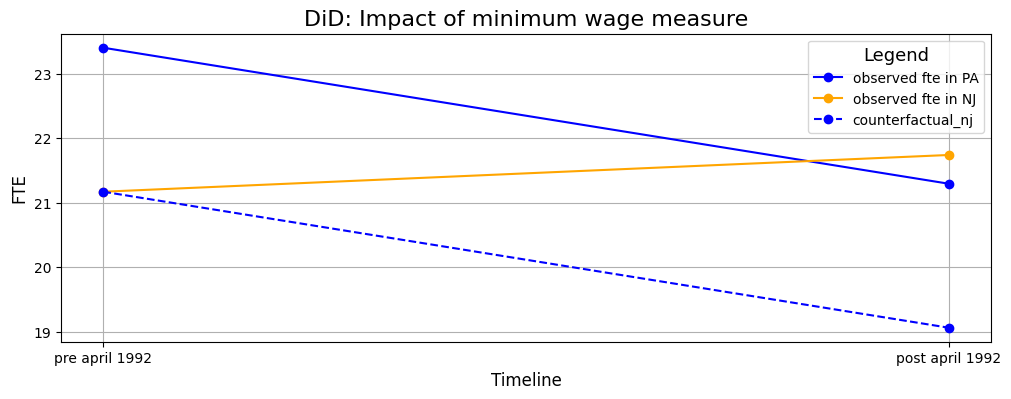

In [34]:
#set up the plot
plt.figure(figsize = (12,4))
time = ['pre april 1992', 'post april 1992']


#plot observed values
plt.plot(time,
         [pre_pa,post_pa],
         marker = 'o',
         linestyle = '-',
         color = 'blue',
         label = 'observed fte in PA')

plt.plot(time,
         [pre_nj,post_nj],
         marker = 'o',
         linestyle = '-',
         color = 'orange',
         label = 'observed fte in NJ')

plt.plot(time,
         [pre_nj,counterfactual],
         marker = 'o',
         linestyle = '--',
         color = 'blue',
         label = 'counterfactual_nj')

plt.title("DiD: Impact of minimum wage measure",
          fontsize = 16)
plt.xlabel("Timeline", fontsize = 12)
plt.ylabel("FTE", fontsize = 12)
plt.legend(loc = 'upper right',
           title = 'Legend',
           fontsize = '10',
           frameon = True,
           title_fontsize = 13)
plt.grid(True)

plt.plot()

#Second model

In [27]:
#define new X with new control variables
X2 = df[['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92', 'bk', 'kfc', 'wendys']]
y = df['fte']

In [28]:
#add constant to X2
X2 = sm.add_constant(X2)
X2.head()

,const,NJ,POST_APRIL92,NJ_POST_APRIL92,bk,kfc,wendys
0,1.0,1,0,0,1,0,0
1,1.0,1,0,0,1,0,0
2,1.0,1,0,0,0,0,0
3,1.0,1,0,0,0,0,0
4,1.0,1,0,0,1,0,0


In [29]:
#regression model
model2 = sm.OLS(y,X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     31.95
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.30e-34
Time:                        14:40:50   Log-Likelihood:                -2902.4
No. Observations:                 820   AIC:                             5819.
Df Residuals:                     813   BIC:                             5852.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.4055      1.085     

###Despite adding new control variables to the model, some of which are highly significant, the coefficient of the variable of interest, i.e, nj_post_april92, remains exactly the same in both models, showing perfect consistency. Hence, proving that increasing minimum wages led to rise in employment in New Jersey.

#Third Model

In [42]:
#define new X with new control variables
X3 = df[['NJ', 'POST_APRIL92', 'NJ_POST_APRIL92', 'bk', 'kfc', 'wendys', 'co_owned', 'centralj', 'southj', 'pa1', 'pa2']]
y = df['fte']

In [43]:
#add constant to X3
X3 = sm.add_constant(X3)
X3.head()

,const,NJ,POST_APRIL92,NJ_POST_APRIL92,bk,kfc,wendys,co_owned,centralj,southj,pa1,pa2
0,1.0,1,0,0,1,0,0,0,1,0,0,0
1,1.0,1,0,0,1,0,0,0,1,0,0,0
2,1.0,1,0,0,0,0,0,0,1,0,0,0
3,1.0,1,0,0,0,0,0,1,0,0,0,0
4,1.0,1,0,0,1,0,0,0,0,0,0,0


In [44]:
#regression model
model3 = sm.OLS(y,X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     22.43
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.66e-37
Time:                        14:59:13   Log-Likelihood:                -2888.8
No. Observations:                 820   AIC:                             5800.
Df Residuals:                     809   BIC:                             5851.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.6833      0.734     

###Again the coefficient for variable of interest is the same